In [46]:
"""
Created on Thur Aug 30 2018

@author: Jonathan Richman
"""

import numpy as np

'''
This is going to be a simple version of the game with limited features.
I just want to make a simple character class that will be general for PC, NPC,
and Monsters.

'''

class Character:
    def __init__(self, current_hp, max_hp, ac, att_bonus_1,att_1,att_bonus_2,att_2,att_bonus_3,att_3,att_bonus_4,att_4):
        self.current_hp=current_hp
        self.max_hp=max_hp
        self.ac=ac
        self.attacks = {}
        self.attacks[1] = att_1, att_bonus_1
        self.attacks[2] = att_2, att_bonus_2
        self.attacks[3] = att_3, att_bonus_3
        self.attacks[4] = att_4, att_bonus_4


    def roll_attack(self, num):
        #add attack bonus to roll
        
        return np.random.randint(0,high=20)+self.attacks[num][1]
    
    def ac_check(self, attack_roll):
        #check to see if attack went through AC
        if attack_roll <= self.ac:
            return True
        else:
            return False

    def check_damage(self, ac_bool, num,bonus_damage=0):
        #if attack hit, update hp
        #attack is an array for the dice to roll e.g. [2,8] is 2d8
        #implement bonus damage later
        if ac_bool:
            damage = bonus_damage
            for i in range(self.attacks[num][0][0]):
                damage+=np.random.randint(0,high=self.attacks[num][0][1])
            
            self.current_hp -= damage

In [47]:
human_fighter = Character(50,50,16,6,[2,6],6,[1,6],4,[1,4],8,[4,6])

In [48]:
rolls=[]
for i in range(10000):
    rolls.append(human_fighter.roll_attack(1))

In [49]:
import matplotlib.pyplot as plt

(array([1044.,  965., 1013., 1059.,  994.,  986.,  964.,  990.,  985.,
        1000.]),
 array([ 6. ,  7.9,  9.8, 11.7, 13.6, 15.5, 17.4, 19.3, 21.2, 23.1, 25. ]),
 <a list of 10 Patch objects>)

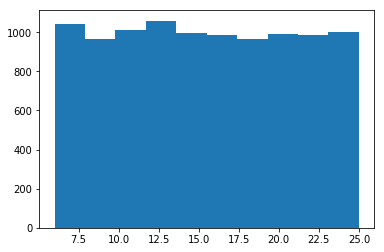

In [50]:
plt.hist(rolls)

In [51]:
roll=human_fighter.roll_attack(1)

In [52]:
ac_bool=human_fighter.ac_check(roll)

In [53]:
human_fighter.check_damage(ac_bool,1)

In [54]:
human_fighter.current_hp

46

In [55]:
human_fighter.max_hp

50